In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Function To Create ROC Curve and Print AUC Score**

In [2]:
def create_plot(y_test,y_pred):
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  print(roc_auc)

  plt.plot(fpr, tpr)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

## **Read Data**

In [3]:
df = pd.read_csv('cs-training.csv')

In [4]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## **Exploratory Data Analysis & Feature Engineering**

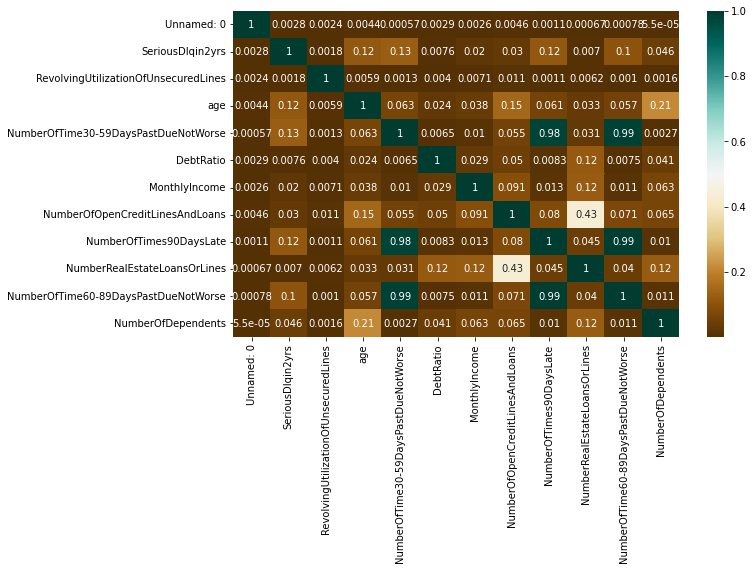

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(np.absolute(df.corr()),annot=True, cmap='BrBG')



*   NumberOfTime30-59DaysPastDueNotWorse has a high correlation with NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  



*   Both MonthlyIncome and NumberOfDependents has null values



In [7]:
df.drop('Unnamed: 0', axis = 1, inplace= True)
feature_list=list(df.columns.values)
for each in feature_list:
    print(each)
    print(df[each].unique())
    print('\n')

SeriousDlqin2yrs
[1 0]


RevolvingUtilizationOfUnsecuredLines
[0.76612661 0.95715102 0.65818014 ... 0.29974515 0.24604392 0.85028295]


age
[ 45  40  38  30  49  74  57  39  27  51  46  76  64  78  53  43  25  32
  58  50  69  24  28  62  42  75  26  52  41  81  31  68  70  73  29  55
  35  72  60  67  36  56  37  66  83  34  44  48  61  80  47  59  77  63
  54  33  79  65  86  92  23  87  71  22  90  97  84  82  91  89  85  88
  21  93  96  99  94  95 101  98 103 102 107 105   0 109]


NumberOfTime30-59DaysPastDueNotWorse
[ 2  0  1  3  4  5  7 10  6 98 12  8  9 96 13 11]


DebtRatio
[0.80298213 0.1218762  0.08511338 ... 0.40429286 0.71656222 0.24990808]


MonthlyIncome
[ 9120.  2600.  3042. ... 15648.   521.  7647.]


NumberOfOpenCreditLinesAndLoans
[13  4  2  5  7  3  8  9  6 10 14 22 17  1 15 31 12 21 11 19 18 26 20 23
  0 16 27 29 28 24 25 32 46 33 30 34 37 38 36 35 54 43 45 49 57 48 40 58
 51 52 39 41 56 42 47 50 44 53]


NumberOfTimes90DaysLate
[ 0  1  3  2  5  4 98 10  9  6  7  

From the code above, we can see that there is someone with an age of 0 years old, which is impossible. Other than that, there are also 98 and 96 values in NumberOfTimes90DaysLate, NumberOfTime60-89DaysPastDueNotWorse, and NumberOfTime30-59DaysPastDueNotWorse which is not impossible, but likely an error that was made when inputting data.

To take care of this problem, we will replace those strange values and Null values with the median of the column

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


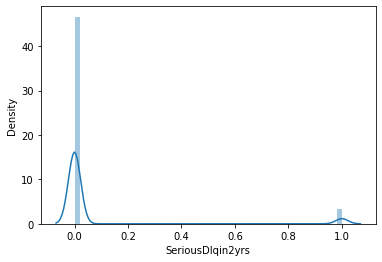

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


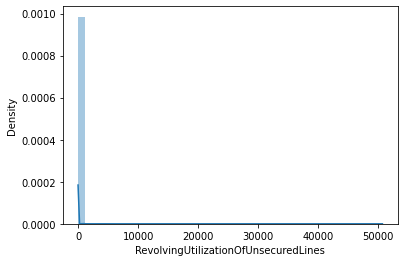

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


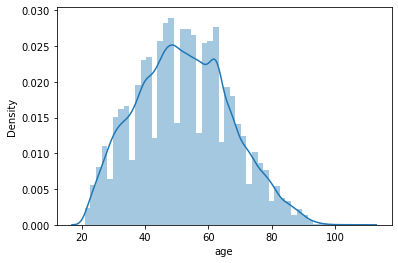

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


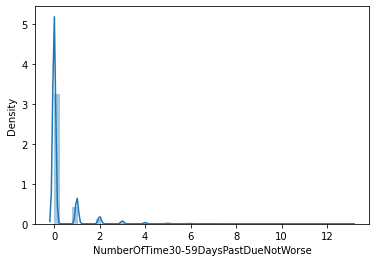

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


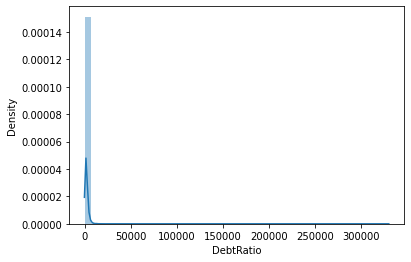

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


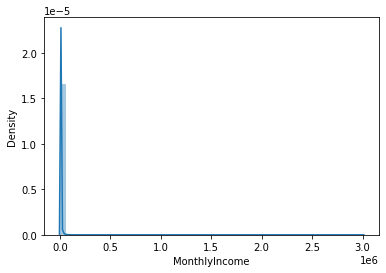

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


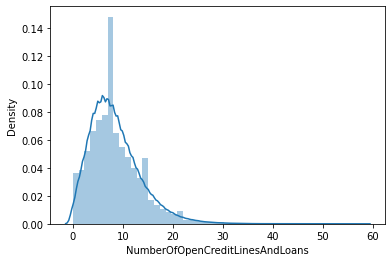

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


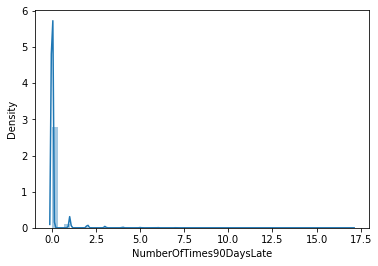

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


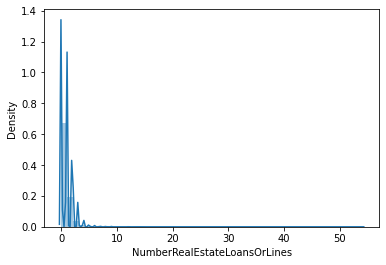

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


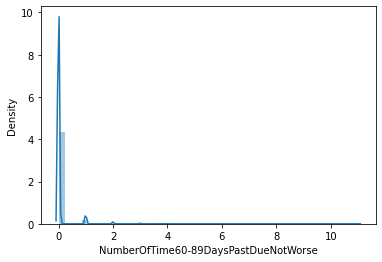

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


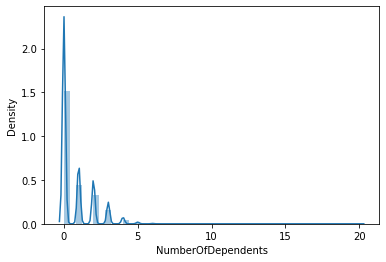

In [8]:
df.loc[df['NumberOfTimes90DaysLate'] == 98, 'NumberOfTimes90DaysLate'] = df['NumberOfTimes90DaysLate'].median()
df.loc[df['NumberOfTimes90DaysLate'] == 96, 'NumberOfTimes90DaysLate'] = df['NumberOfTimes90DaysLate'].median()

df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] == 98, 'NumberOfTime60-89DaysPastDueNotWorse'] = df['NumberOfTime60-89DaysPastDueNotWorse'].median()
df.loc[df['NumberOfTime60-89DaysPastDueNotWorse'] == 96, 'NumberOfTime60-89DaysPastDueNotWorse'] = df['NumberOfTime60-89DaysPastDueNotWorse'].median()

df.loc[df['NumberOfTime30-59DaysPastDueNotWorse'] == 98, 'NumberOfTime30-59DaysPastDueNotWorse'] = df['NumberOfTime30-59DaysPastDueNotWorse'].median()
df.loc[df['NumberOfTime30-59DaysPastDueNotWorse'] == 96, 'NumberOfTime30-59DaysPastDueNotWorse'] = df['NumberOfTime30-59DaysPastDueNotWorse'].median()

df.loc[df['age'] == 0, 'age'] = df['age'].median()
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(), inplace=True)
df['NumberOfDependents'].fillna(df['NumberOfDependents'].median(), inplace=True)

feature_list=list(df.columns.values)
for each in feature_list:
    sns.distplot(df[each])
    plt.show()

In [9]:
log_trans_list = df.columns.values[[1,3,4,5,7,8,9,10]]
print(log_trans_list)
for each in log_trans_list:
    df[each] = np.log(1+df[each].values)

['RevolvingUtilizationOfUnsecuredLines'
 'NumberOfTime30-59DaysPastDueNotWorse' 'DebtRatio' 'MonthlyIncome'
 'NumberOfTimes90DaysLate' 'NumberRealEstateLoansOrLines'
 'NumberOfTime60-89DaysPastDueNotWorse' 'NumberOfDependents']


From the code above, we can clearly see that the columns above are highly skewed to the left. To fix this issue, we can apply a log transformation to the columns above to create a normal distribution

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


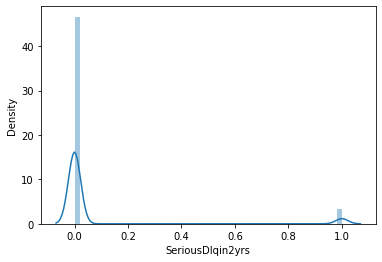

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


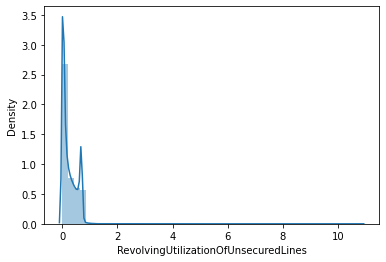

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


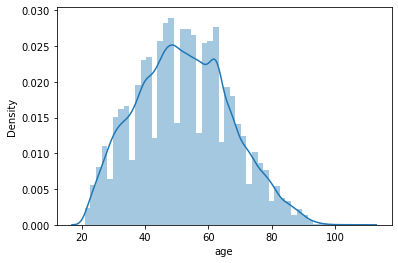

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


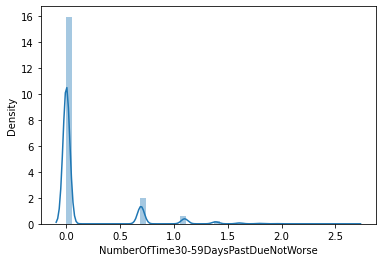

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


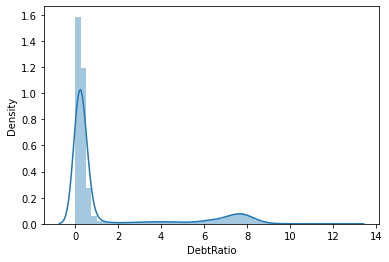

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


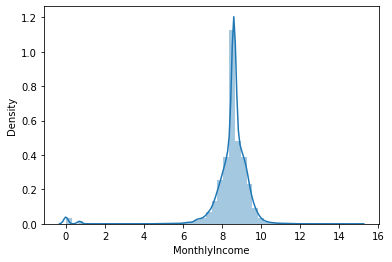

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


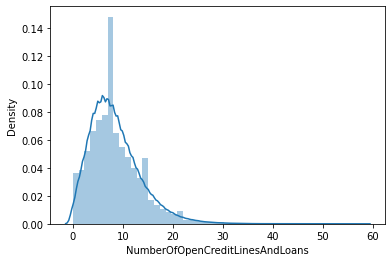

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


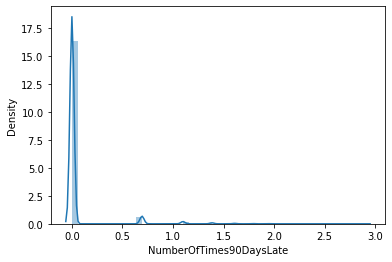

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


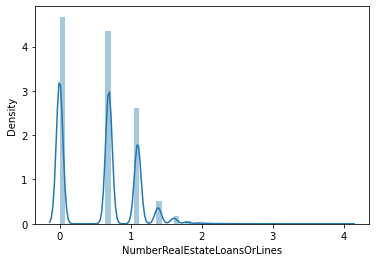

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


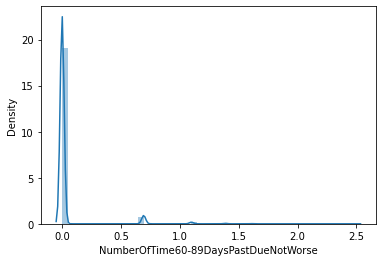

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


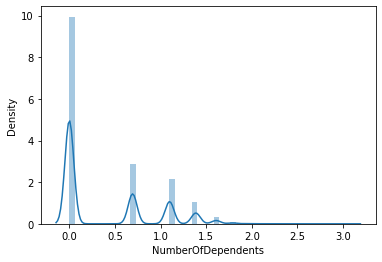

In [10]:
for each in feature_list:
    sns.distplot(df[each])
    plt.show()

In [11]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

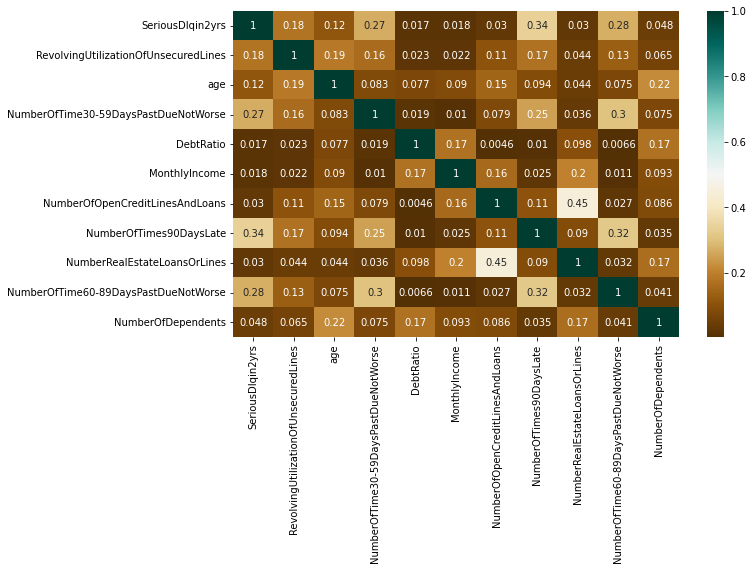

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(np.absolute(df.corr()),annot=True, cmap='BrBG')

After applying feature engineering techniques, multicollinearity has been reduced in the dataset

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

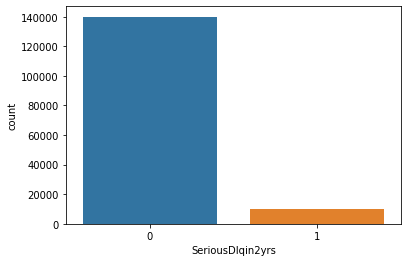

In [13]:
sns.countplot(df['SeriousDlqin2yrs'])
df['SeriousDlqin2yrs'].value_counts()

From the Graph above, we can see that the data is highly skewed, with with the target 0 being almost 14 times larger than target 1, to fix this issue we can use different methods balance the data, such as Resampling and SMOTE

## **Train Test Split**

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state = 42)

sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

For this dataset, i will be using 4 different Algorithms, which are:
*   Logistic Regression
*   XGBoost
*   Random Forest
*   Gradient Boosting







For Comparison's sake, i will use the Original Target Values first to compare the results with resampling and SMOTE

# **Original Target Values**

### LOGISTIC REGRESSION

0.8545501586919138


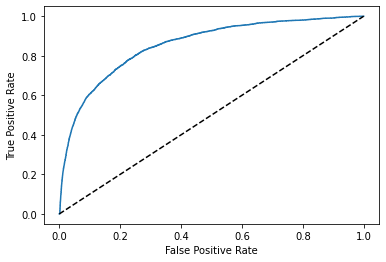



              precision    recall  f1-score   support

           0       0.98      0.82      0.89     49047
           1       0.22      0.72      0.34      3453

    accuracy                           0.81     52500
   macro avg       0.60      0.77      0.61     52500
weighted avg       0.93      0.81      0.86     52500



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score
lr = LogisticRegression(random_state=123, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)

lr.fit(X_train, y_train)
clf_scores_proba = lr.predict_proba(X_test) 
clf_preds = clf_scores_proba[::,1] 

create_plot(y_test,clf_preds)

print("\n")
print(classification_report(y_test, lr.predict(X_test)))

### XGBOOST

0.8648506210385588


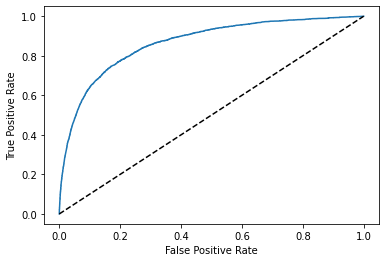



              precision    recall  f1-score   support

           0       0.94      0.99      0.97     49047
           1       0.61      0.18      0.27      3453

    accuracy                           0.94     52500
   macro avg       0.78      0.58      0.62     52500
weighted avg       0.92      0.94      0.92     52500



In [16]:
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="binary:logistic")
xgb.fit(X_train, y_train)

clf_scores_proba = xgb.predict_proba(X_test)
clf_preds = clf_scores_proba[::,1] 

create_plot(y_test,clf_preds)

print("\n")
print(classification_report(y_test, xgb.predict(X_test)))

### RANDOM FOREST

0.7907394876847943


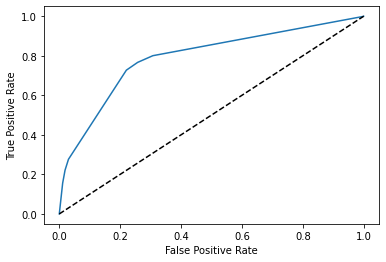



              precision    recall  f1-score   support

           0       0.98      0.74      0.84     49047
           1       0.17      0.77      0.28      3453

    accuracy                           0.74     52500
   macro avg       0.58      0.75      0.56     52500
weighted avg       0.93      0.74      0.81     52500



In [17]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

random_forest = RandomForestClassifier( max_depth=3, n_estimators=1, class_weight='balanced')
random_forest.fit(X_train, y_train)
clf_scores_proba = random_forest.predict_proba(X_test)
clf_preds = clf_scores_proba[::,1] 

create_plot(y_test,clf_preds)

print("\n")
print(classification_report(y_test, random_forest.predict(X_test)))

### GRADIENT BOOSTING

0.8638553995835989


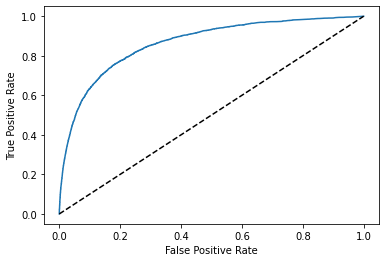



              precision    recall  f1-score   support

           0       0.95      0.99      0.97     49047
           1       0.59      0.18      0.28      3453

    accuracy                           0.94     52500
   macro avg       0.77      0.59      0.62     52500
weighted avg       0.92      0.94      0.92     52500



In [18]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
clf_scores_proba = clf.predict_proba(X_test)
clf_preds = clf_scores_proba[::,1] 

create_plot(y_test,clf_preds)

print("\n")
print(classification_report(y_test, clf.predict(X_test)))

# **RESAMPLING**

In [19]:
from sklearn.utils import resample
df_majority = df[(df['SeriousDlqin2yrs']==0)] 
df_minority = df[(df['SeriousDlqin2yrs']==1)] 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples= 139974,
                                 random_state=42)
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [20]:
df_upsampled['SeriousDlqin2yrs'].value_counts()
X = df_upsampled.drop('SeriousDlqin2yrs', axis=1)
y = df_upsampled['SeriousDlqin2yrs'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

LOGISTIC REGRESSION

0.8545720889503726


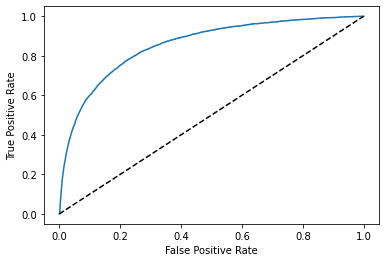



              precision    recall  f1-score   support

           0       0.75      0.82      0.78     42136
           1       0.80      0.73      0.76     41849

    accuracy                           0.77     83985
   macro avg       0.78      0.77      0.77     83985
weighted avg       0.78      0.77      0.77     83985



In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score
lr_resampling = LogisticRegression(random_state=123, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)

lr_resampling.fit(X_train, y_train)
clf_scores_proba = lr_resampling.predict_proba(X_test) 
clf_preds = clf_scores_proba[::,1]

create_plot(y_test,clf_preds)

print("\n")
print(classification_report(y_test, lr_resampling.predict(X_test)))

XGBOOST

0.8690275443325283


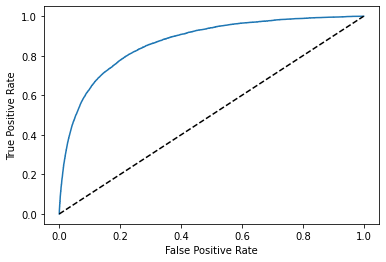



              precision    recall  f1-score   support

           0       0.79      0.79      0.79     42136
           1       0.79      0.79      0.79     41849

    accuracy                           0.79     83985
   macro avg       0.79      0.79      0.79     83985
weighted avg       0.79      0.79      0.79     83985



In [23]:
from xgboost import XGBClassifier
# fit model no training data
xgb_resampling = XGBClassifier(objective="binary:logistic")
xgb_resampling.fit(X_train, y_train)

clf_scores_proba = xgb_resampling.predict_proba(X_test)    # Predict class probabilities for X.
clf_preds = clf_scores_proba[::,1] # predictions

create_plot(y_test,clf_preds)

print("\n")
print(classification_report(y_test, xgb_resampling.predict(X_test)))

RANDOM FOREST

0.7888228470292601


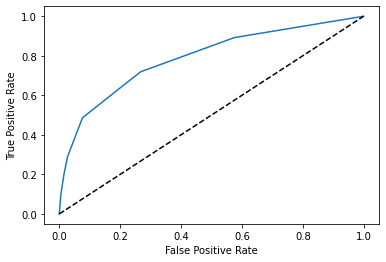



              precision    recall  f1-score   support

           0       0.72      0.73      0.73     42136
           1       0.73      0.72      0.72     41849

    accuracy                           0.73     83985
   macro avg       0.73      0.73      0.73     83985
weighted avg       0.73      0.73      0.73     83985



In [24]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

random_forest_resampling = RandomForestClassifier( max_depth=3, n_estimators=1, class_weight='balanced')
random_forest_resampling.fit(X_train, y_train)
clf_scores_proba = random_forest_resampling.predict_proba(X_test)
clf_preds = clf_scores_proba[::,1] 

create_plot(y_test,clf_preds)

print("\n")
print(classification_report(y_test, random_forest_resampling.predict(X_test)))

GRADIENT BOOSTING

0.8696154218469765


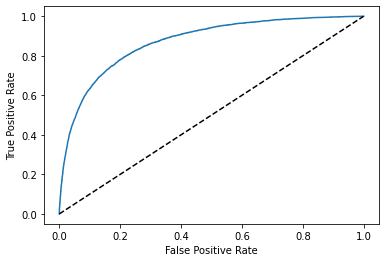



              precision    recall  f1-score   support

           0       0.79      0.79      0.79     42136
           1       0.79      0.79      0.79     41849

    accuracy                           0.79     83985
   macro avg       0.79      0.79      0.79     83985
weighted avg       0.79      0.79      0.79     83985



In [25]:
clf_resampling = GradientBoostingClassifier()
clf_resampling.fit(X_train, y_train)
clf_scores_proba = clf_resampling.predict_proba(X_test)
clf_preds = clf_scores_proba[::,1] 

create_plot(y_test,clf_preds)

print("\n")
print(classification_report(y_test, clf_resampling.predict(X_test)))

# **SMOTE**

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
oversampled_X, oversampled_Y = sm.fit_resample(df.drop('SeriousDlqin2yrs', axis=1), df['SeriousDlqin2yrs'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

X = oversampled.drop('SeriousDlqin2yrs', axis=1)
y = oversampled['SeriousDlqin2yrs'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

LOGISTIC REGRESSION

0.8629402476842967


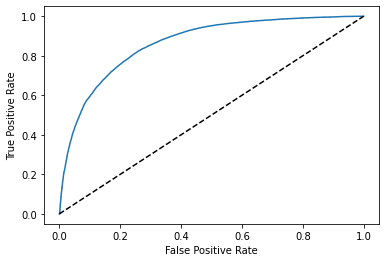



              precision    recall  f1-score   support

           0       0.76      0.81      0.78     41838
           1       0.80      0.74      0.77     42147

    accuracy                           0.78     83985
   macro avg       0.78      0.78      0.78     83985
weighted avg       0.78      0.78      0.78     83985



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score
lr_smote = LogisticRegression(random_state=123, solver='saga', penalty='l1', class_weight='balanced', C=1.0, max_iter=500)

lr_smote.fit(X_train, y_train)
clf_scores_proba = lr_smote.predict_proba(X_test)    # Predict class probabilities for X.
clf_preds = clf_scores_proba[::,1] # predictions

create_plot(y_test,clf_preds)

print("\n")
print(classification_report(y_test, lr_smote.predict(X_test)))

XGBOOST

0.9692539505682749


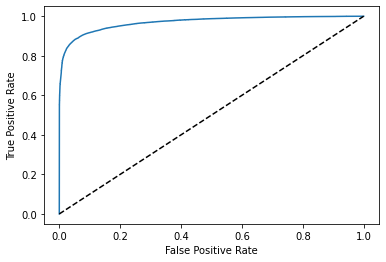



              precision    recall  f1-score   support

           0       0.89      0.95      0.92     41838
           1       0.95      0.88      0.91     42147

    accuracy                           0.91     83985
   macro avg       0.92      0.92      0.91     83985
weighted avg       0.92      0.91      0.91     83985



In [29]:
from xgboost import XGBClassifier
# fit model no training data
xgb_smote = XGBClassifier(objective="binary:logistic")
xgb_smote.fit(X_train, y_train)

clf_scores_proba = xgb_smote.predict_proba(X_test)    # Predict class probabilities for X.
clf_preds = clf_scores_proba[::,1] # predictions

create_plot(y_test,clf_preds)

print("\n")
print(classification_report(y_test, xgb_smote.predict(X_test)))

RANDOM FOREST

0.8559859541386731


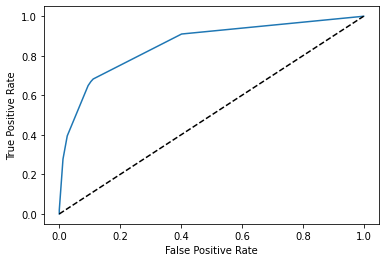



              precision    recall  f1-score   support

           0       0.74      0.89      0.80     41838
           1       0.86      0.68      0.76     42147

    accuracy                           0.79     83985
   macro avg       0.80      0.79      0.78     83985
weighted avg       0.80      0.79      0.78     83985



In [30]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

random_forest_smote = RandomForestClassifier( max_depth=3, n_estimators=1, class_weight='balanced')
random_forest_smote.fit(X_train, y_train)
clf_scores_proba = random_forest_smote.predict_proba(X_test)
clf_preds = clf_scores_proba[::,1] 

create_plot(y_test,clf_preds)

print("\n")
print(classification_report(y_test, random_forest_smote.predict(X_test)))

GRADIENT BOOSTING

0.968730172249909


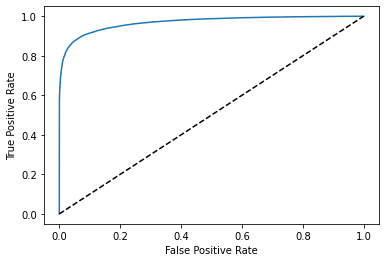



              precision    recall  f1-score   support

           0       0.89      0.95      0.92     41838
           1       0.94      0.88      0.91     42147

    accuracy                           0.91     83985
   macro avg       0.91      0.91      0.91     83985
weighted avg       0.91      0.91      0.91     83985



In [31]:
clf_smote = GradientBoostingClassifier()
clf_smote.fit(X_train, y_train)
clf_scores_proba = clf_smote.predict_proba(X_test)
clf_preds = clf_scores_proba[::,1] 

create_plot(y_test,clf_preds)

print("\n")
print(classification_report(y_test, clf_smote.predict(X_test)))

# **SUBMISSION**

From the results above, we have some very interesting results. 

*   First, we found out that Resampling actually makes the models perform worse than not using Resampling.
*   Second, We also found out that by using SMOTE with XGBoost, we will get an AUC Score of 0.9649, which is the highest score of them all. However, when we apply cs-test.csv with this method we only get a score of 0.78693. When compared with XGBoost with the original target values, the score increases to 0.85702, despite the fact that this method has lower training AUC Score. This can mean that SMOTE induces overfitting on this particular dataset, because when training the results are near flawless, but when faced with new data the results became worse.

Because XGBoost with the original target values produces the largest score on the new data, we will use this method to submit the data.

In [32]:
credit_test_df = pd.read_csv('cs-test.csv')
col_names = credit_test_df.columns.values
col_names[0] = 'ID'
credit_test_df.columns = col_names

credit_test_df['MonthlyIncome'].fillna(credit_test_df['MonthlyIncome'].median(), inplace=True)
credit_test_df['NumberOfDependents'].fillna(credit_test_df['NumberOfDependents'].median(), inplace=True)

In [33]:
credit_test_df.isnull().sum()

ID                                           0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

In [34]:
I = credit_test_df.drop(['ID','SeriousDlqin2yrs'], axis=1).values
J = credit_test_df['SeriousDlqin2yrs'].values

I = sc.transform(I)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [35]:
clf_scores_proba = xgb.predict_proba(I)
final_pred = clf_scores_proba[:,1] 

In [36]:
prediction = pd.DataFrame({
        "Id": credit_test_df["ID"],
        "Probability": final_pred
    })
prediction.to_csv('submit.csv', index=False)

In [37]:
from google.colab import files
files.download("submit.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>